<h1 style='text-align:center;'>Pima Indians Diabetes - Prediction of the onset of diabetes </h1>

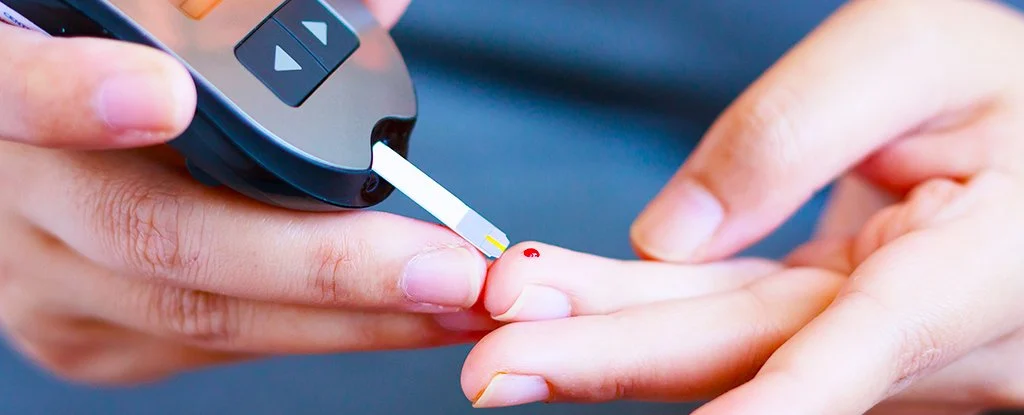

<font color="#089371" size=+2.5><b>0. Introduction</b></font>

> About this Dataset
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

> Features explanation
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure
4. SkinThickness: Triceps skin fold thickness
5. Insulin: 2-Hour serum insulin 
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

> What is our target ?
- Build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

<font color="#089371" size=+2.5><b>1. Import Modules</b></font>

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2) # Standard figure size for all 
 
# Feature selection 
from numpy import sqrt, abs, round
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats.stats import kendalltau

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

<font color="#089371" size=+2.5><b>2. Assessing Data</b></font>

In [2]:
# load dataset
df_original = pd.read_csv("Data//diabetes.csv")
#Its always better to have a copy of you dataset.....
df = df_original.copy() 

In [3]:
# The shape of the dataset
df.shape

(768, 9)

In [4]:
# show sample of data
df.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
389            3      100             68             23       81  31.6   
627            0      132             78              0        0  32.4   
460            9      120             72             22       56  20.8   
101            1      151             60              0        0  26.1   
381            0      105             68             22        0  20.0   
294            0      161             50              0        0  21.9   
589            0       73              0              0        0  21.1   
71             5      139             64             35      140  28.6   
239            0      104             76              0        0  18.4   

     DiabetesPedigreeFunction  Age  Outcome  
60                      0.304   21        0  
389                     0.949   28        0  
627                     0.393   21        0  
460                     0.733   48        0  
101                     0.179   22        0  
381                     0.236   22        0  
294                     0.254   65        0  
589                     0.342   25        0  
71                      0.411   26        0  
239                     0.582   27        0

In [5]:
# dara information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Data Types : 
- Number of numerical variable is 9 
- Number of catogerical variable is zero  

In [6]:
# statistical information of data 
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### Discover unique values 

In [7]:
dict_={}
for i in df.columns:
    dict_[i]=df[i].value_counts().shape[0]
    
pd.DataFrame(dict_,index=['Unique']).T

Unique
Pregnancies                   17
Glucose                      136
BloodPressure                 47
SkinThickness                 51
Insulin                      186
BMI                          248
DiabetesPedigreeFunction     517
Age                           52
Outcome                        2

### Check if there is any duplicated rows 

In [8]:
print(f"Number of duplicated rows is: {df.duplicated().sum()}")

Number of duplicated rows is: 0


<font color="#089371" size=+2.5><b>3. Exploratory Data Analysis (EDA)</b></font>

<font color="#08B4E4" size=+1.5><b>3.1. Unvariate analysis </b></font>

In [9]:
def distripution(feature): 
    #Plot Histrogram of Pregnancies Features......
    sns.histplot(df, x=feature,color=sns.color_palette()[4]);
    plt.title("Distribution Of The"+ feature +"Feature",fontsize=15,loc="center",fontweight=10, fontstyle='italic')
    plt.ylabel("Frequency",fontsize=12.5)
    plt.xlabel(feature,fontsize=12.5)

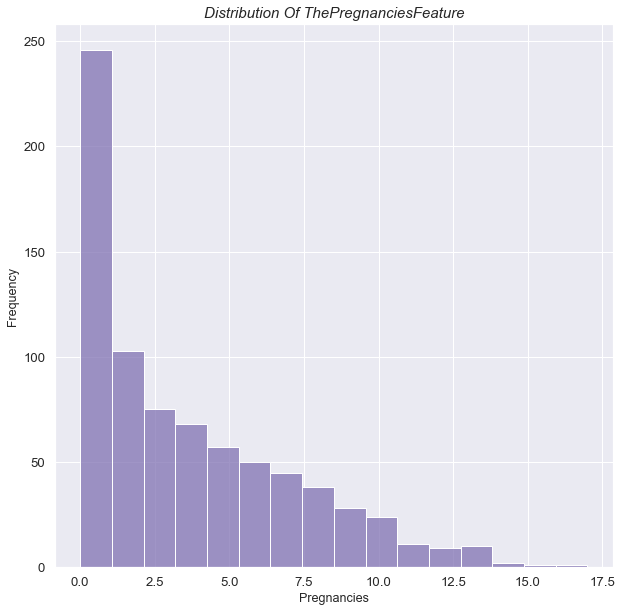

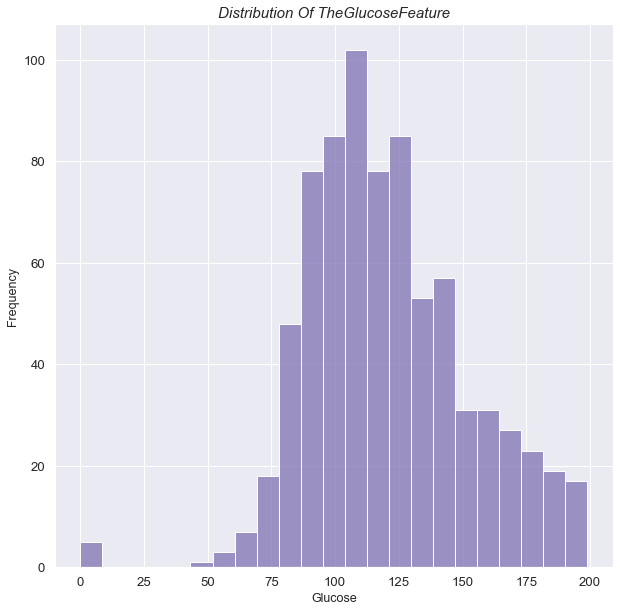

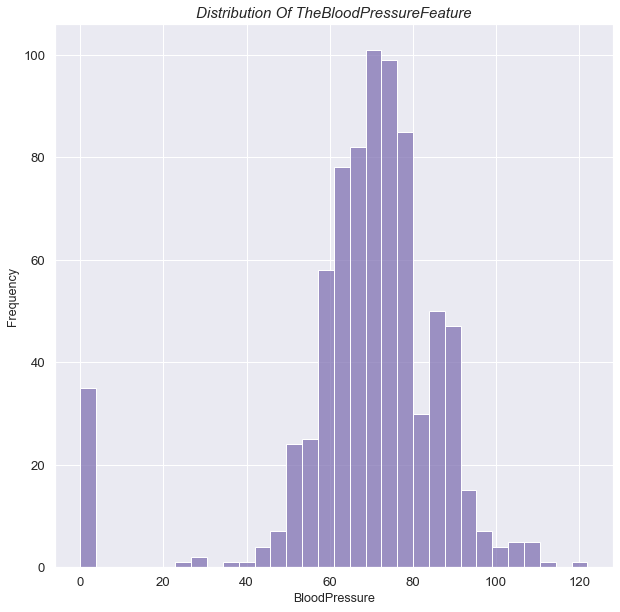

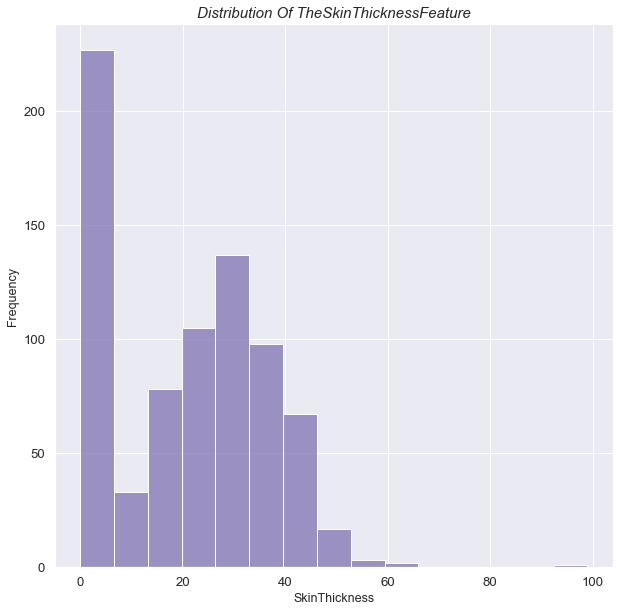

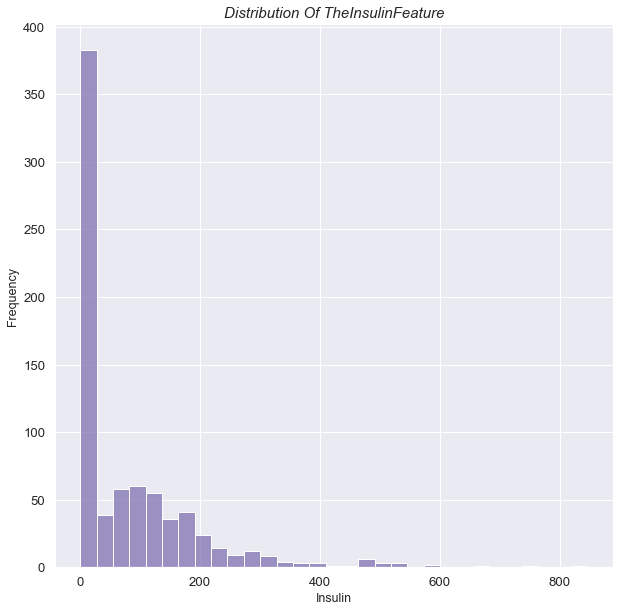

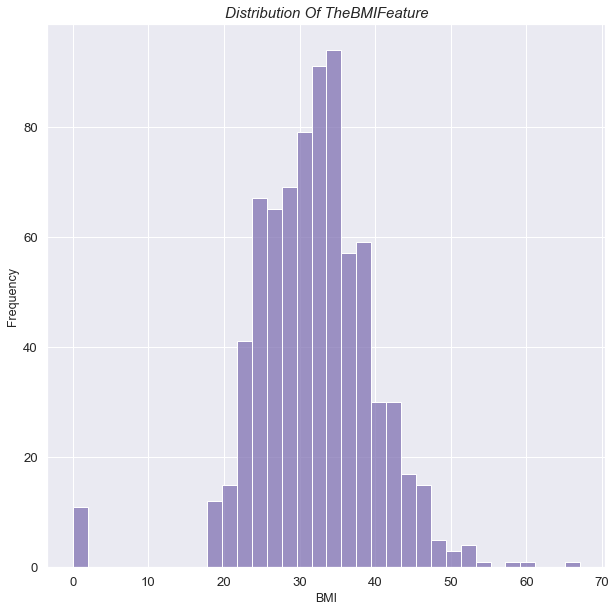

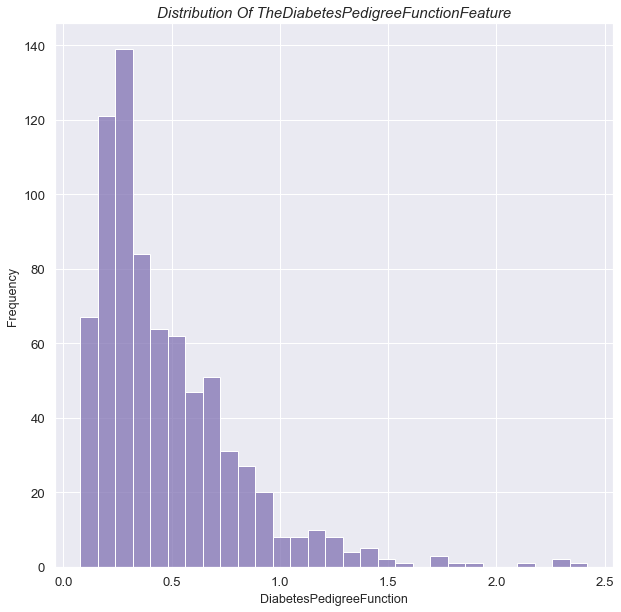

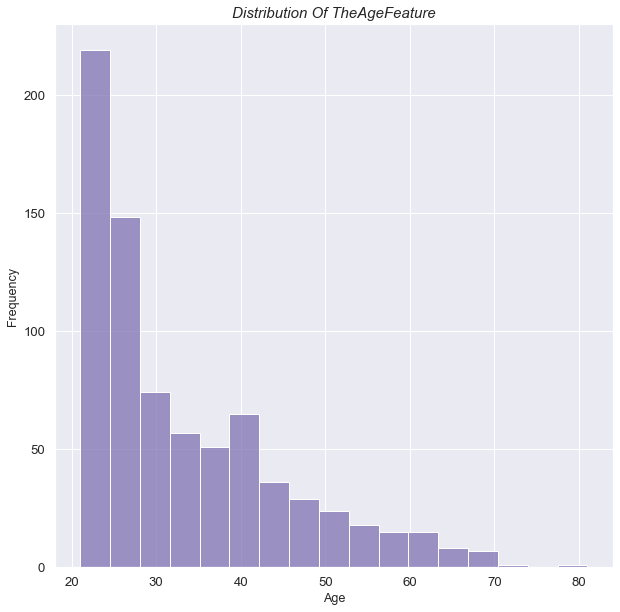

In [10]:
for  i in df.columns[:-1]: 
    distripution(i)
    plt.show()

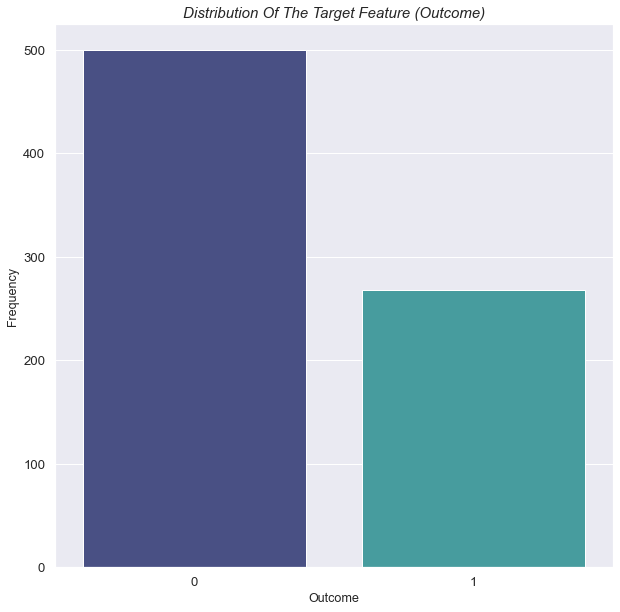

In [11]:
sns.countplot(x='Outcome' , data=df ,palette='mako');
plt.title("Distribution Of The Target Feature (Outcome)",fontsize=15,loc="center",fontweight=10, fontstyle='italic');
plt.ylabel("Frequency",fontsize=12.5)
plt.xlabel("Outcome",fontsize=12.5);

<font color="##FF0000" size=+1.5><b>Insights</b></font>

> problem: Target feature is implanced.  

> To solve ths problem: we have to oversapling our data. 


In [12]:
from imblearn.over_sampling import SMOTE

x,y = df.drop("Outcome",axis=1), df['Outcome']
smote = SMOTE()

x,y = smote.fit_resample(x,y)

In [13]:
df = pd.concat([x,y],axis=1)

> problem: [Glucose, blood pressure, Skin Thickness, Insulin, BMI] cannot be "zero"

> To solve ths problem: we have to replace all zeros with mean or median 
- I found that KNN leads to less score in thi case 

In [14]:
# col_names = df.columns[:-1]

In [15]:
# col_names

In [16]:
# from sklearn.impute import KNNImputer 
# imputer = KNNImputer(missing_values=0 , n_neighbors=5)
# df_1 = imputer.fit_transform(df.drop("Outcome",axis=1))

In [17]:
# df = pd.concat([pd.DataFrame(df_1,columns=col_names),df["Outcome"]],axis=1)

In [18]:
# Replacing zeres with mean & median
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [19]:
# df = df.convert_dtypes()

In [20]:
# Correcting data types
df["Glucose"]=df["Glucose"].astype(int)
df["BloodPressure"]=df["BloodPressure"].astype(int)
df["SkinThickness"]=df["SkinThickness"].astype(int)
df["Insulin"]=df["Insulin"].astype(int)
df["Pregnancies"]=df["Pregnancies"].astype(int)
df["Age"]=df["Age"].astype(int)
df["Outcome"]=df["Outcome"].astype(int)

In [21]:
# Check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int32  
 1   Glucose                   1000 non-null   int32  
 2   BloodPressure             1000 non-null   int32  
 3   SkinThickness             1000 non-null   int32  
 4   Insulin                   1000 non-null   int32  
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int32  
 8   Outcome                   1000 non-null   int32  
dtypes: float64(2), int32(7)
memory usage: 43.1 KB


<font color="##FF0000" size=+1.5><b>Insights</b></font>

> problem: Some of our features having outliers 

> To solve ths problem: we have to use IQR technique

### Detect Outliers and removing it 
- It was found that removing Outliers leads to lower accuracy rates. Therefore, this method has been discontinued

In [22]:
# from datasist.structdata import detect_outliers 

# outliears = detect_outliers(df,0,df.columns)
# df.drop(outliears,inplace=True)

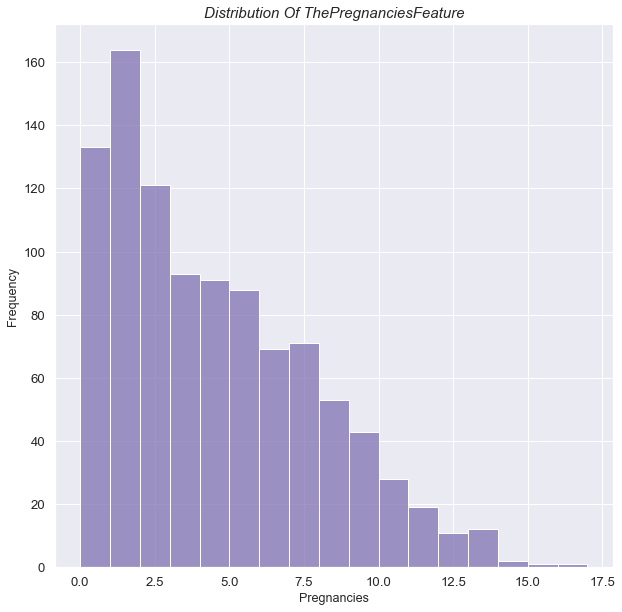

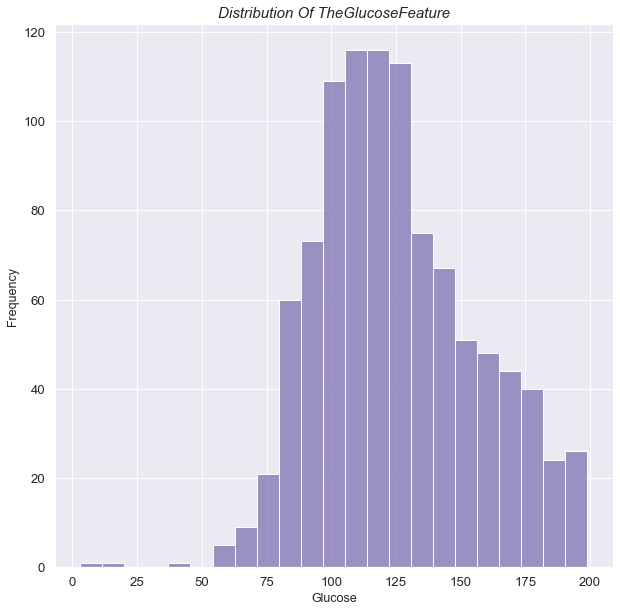

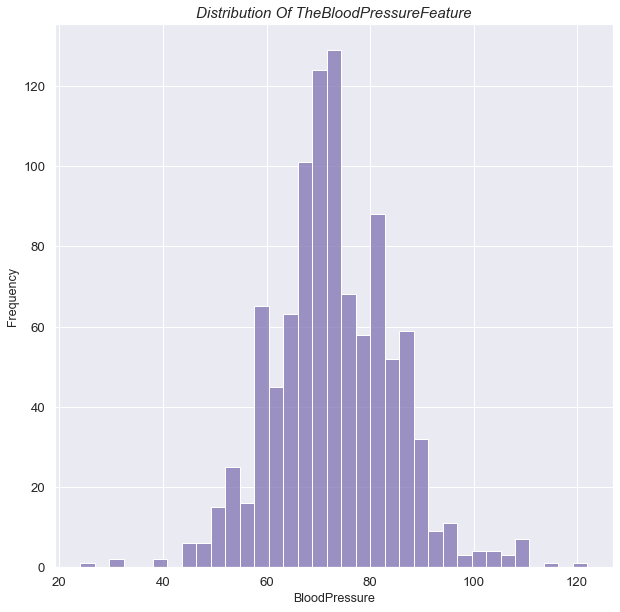

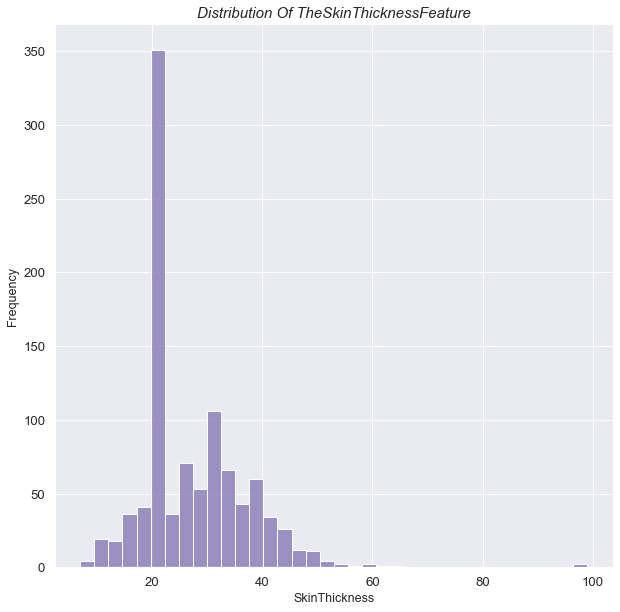

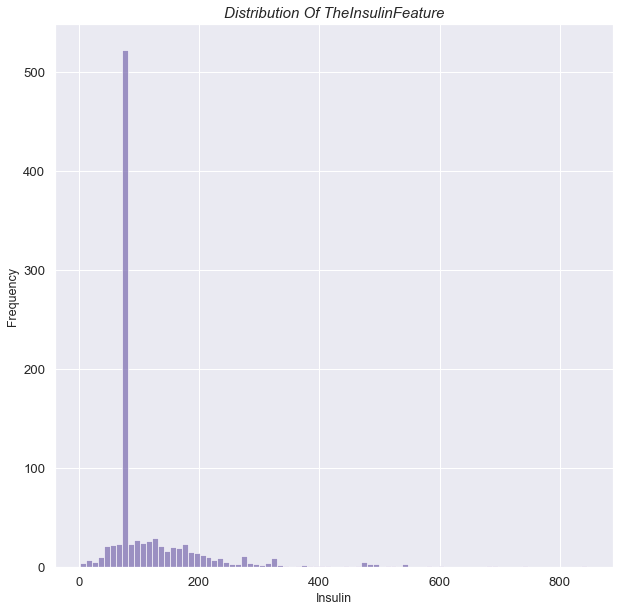

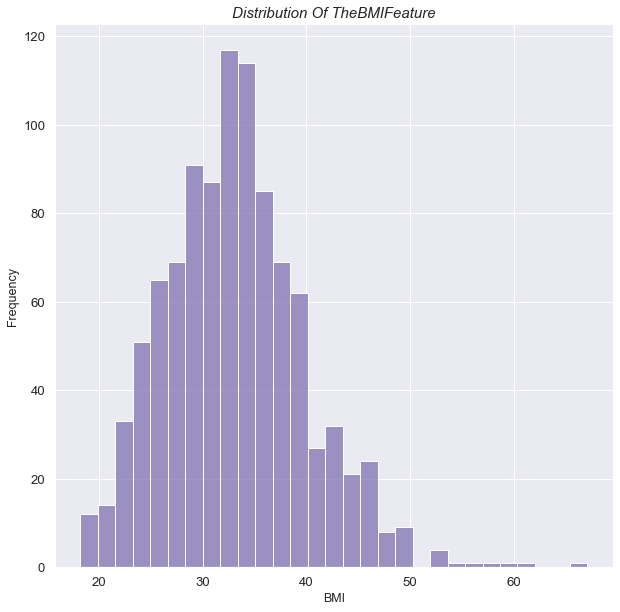

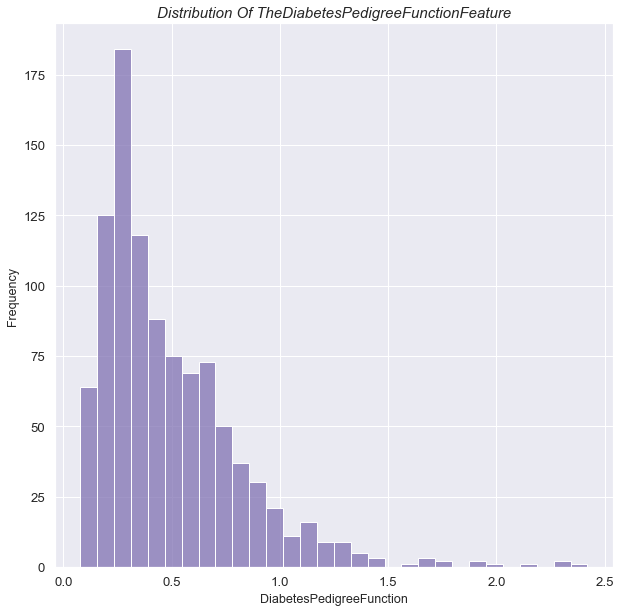

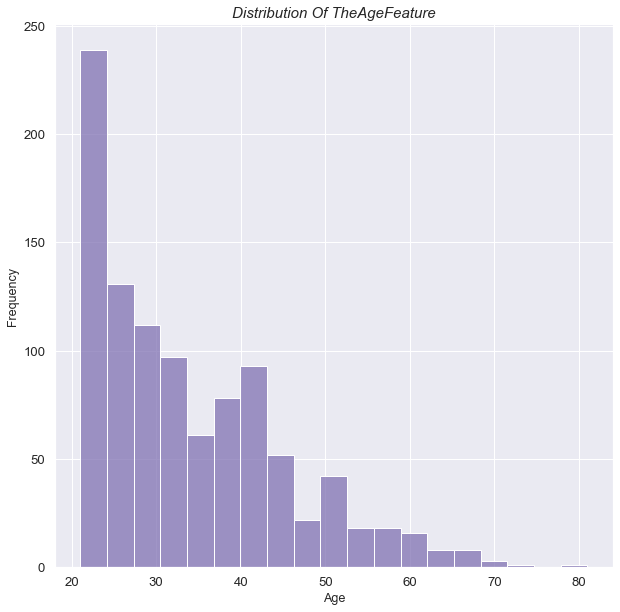

In [23]:
for i in df.columns[:-1]: 
    distripution(i)
    plt.show()

<font color="#08B4E4" size=+1.5><b>3.2. Bivariate analysis </b></font>

In [24]:
def Impact_visuals(feature):
    fig = px.histogram(df, x=feature, color="Outcome",
                   hover_data=df.columns,template ="simple_white",color_discrete_sequence = px.colors.diverging.Earth_r)
    fig.update_layout(title_text="<b> How does"+ feature + " impact on the outcome?</b>",
                  title_x=0.5, 
                  font_size=15)
    fig.show()
    

In [25]:
for i in df.columns[:-1]: 
    Impact_visuals(i)
    plt.show()

<font color="#08B4E4" size=+1.5><b>3.3. Multivariate analysis </b></font>

### Checking The Relationship Between The Features

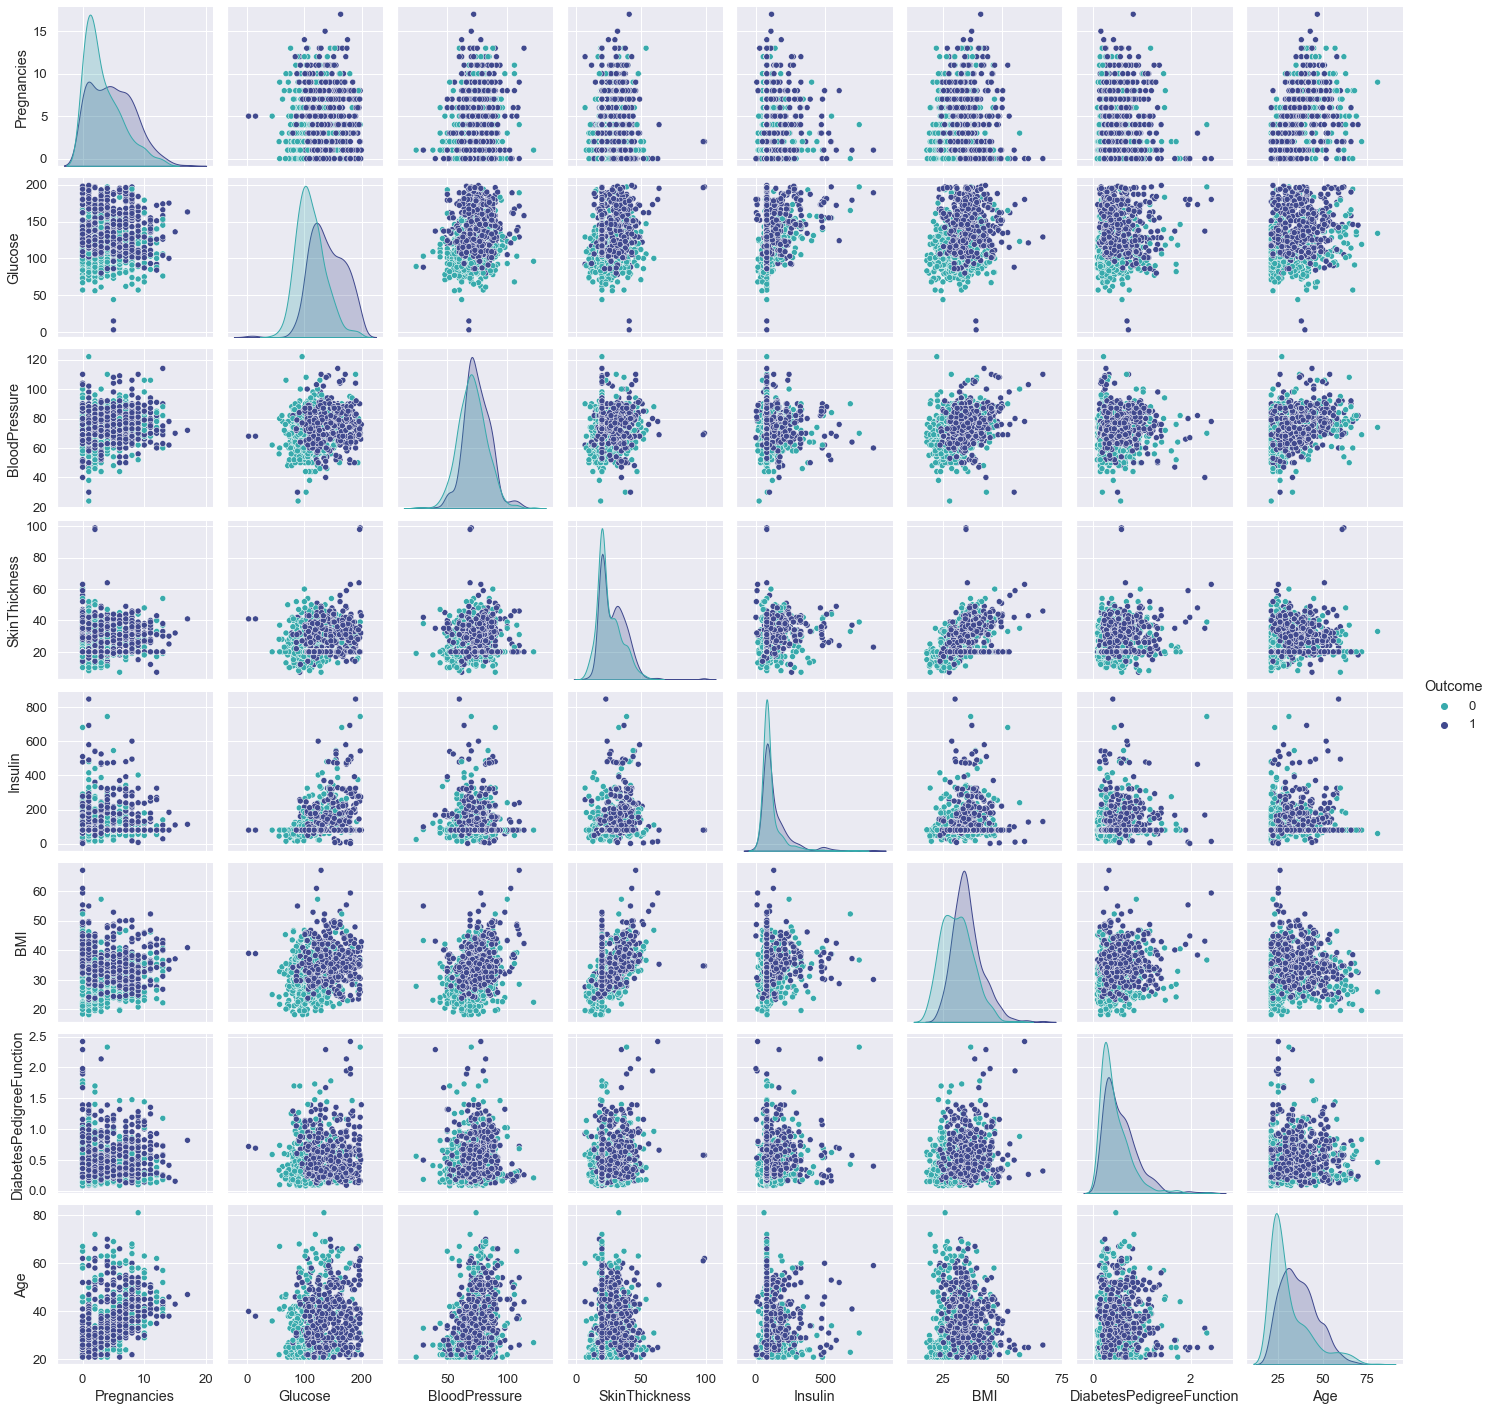

In [26]:
sns.pairplot(df,hue='Outcome',palette="mako_r");

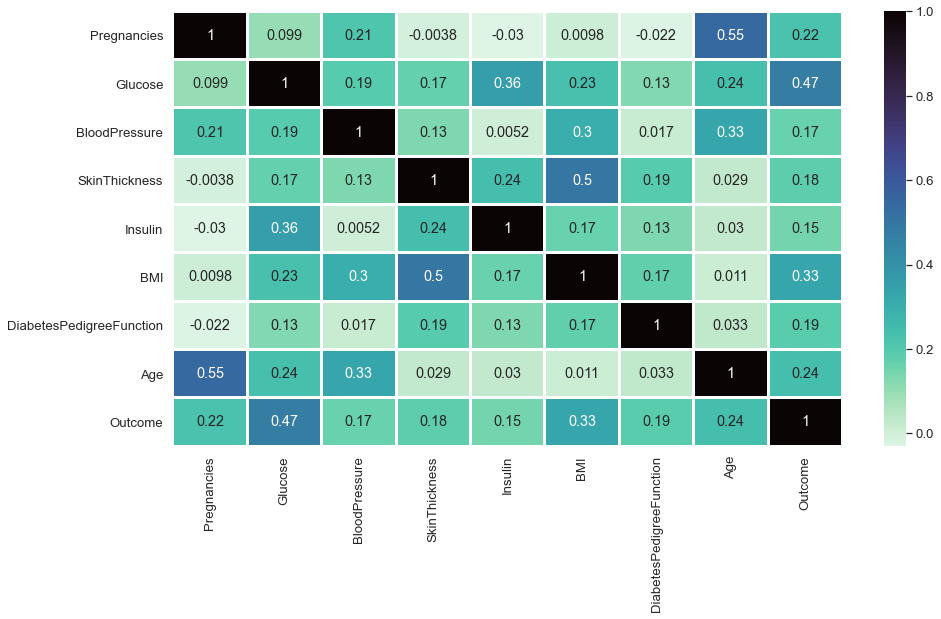

In [27]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True,cmap = "mako_r",linewidths=2,linecolor = "white",cbar=True);

### Find the correlation between features and Outcome

In [28]:
# creating the dataset
cols_names = list(df.corr().columns)[:-1]
cols_values = list(df.corr().Outcome)

In [29]:
# creating the dataset
dict__ = {}
count = 0 
for i in cols_names[:-1] : 
    dict__[i] = cols_values[count]
    count += 1

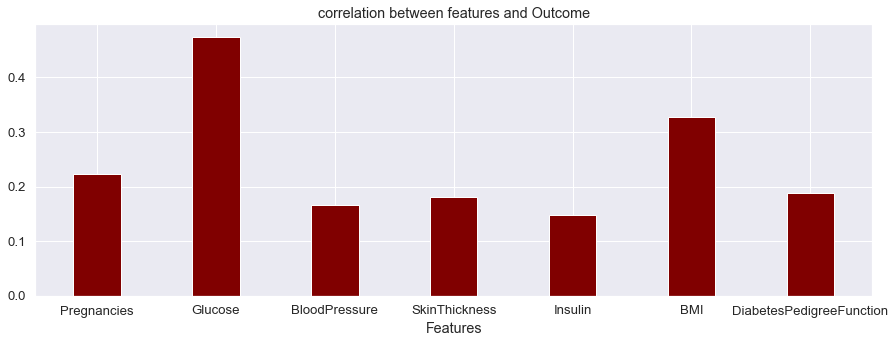

In [30]:
# creating the dataset
data = dict__
Features = list(data.keys())
values = list(data.values())

# Costumize figure 
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(Features, values, color ='maroon', width = 0.4)
plt.xlabel("Features")
plt.title("correlation between features and Outcome");

<font color="#089371" size=+2.5><b>4. Feature Selection </b></font>

#### How to choose the best feature selection technique ? 

> One way to think about feature selection methods are in terms of supervised and unsupervised methods,The difference has to do with whether features are selected based on the target variable or not.
- According to our problem here which is Supervised problem (Classification), we need a feature selection method which fit our problem 

#### What are Techniques of feature selection ? 

1. Wrapper: Search for well-performing subsets of features.
2. Filter: Select subsets of features based on their relationship with the target.
3. Intrinsic: Algorithms that perform automatic feature selection during training. 
> In this problem we don't interested in Wrapper method 

## So, let's start with filter methods 


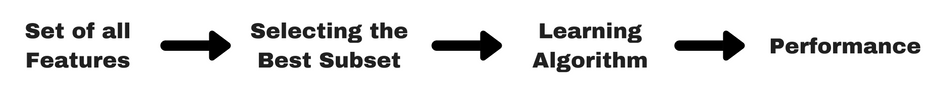

> The more that is known about the data type of a variable, the easier it is to choose an appropriate statistical measure for a filter-based feature selection method.

- In this problem, we need to test each feature with our target feature, so what is data type of our feature ? 

> All input feature are **Numerical** and the output feature is **categorical**.

- According to the type of this calssification problem we will find the most common filter method 

>  **(Binary Classification)** 

- In this case the common statistical method to fit our data are:   
    1. Kendall Rank Correlation
    2. ANOVA

<h1 style='text-align:center;'>Kendall Rank Correlation</h1>

> Why use Kendall Rank Correlation ? 
- Kendall Rank Correlation measures the strength and direction of association that exists (determines if there's a monotonic relationship) between two variables.
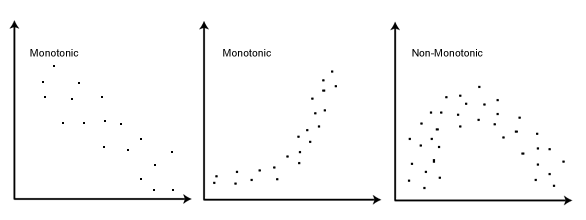

### Use .corr() to calculate the Kendall Tau Statistic
This will return the Kendall Rank Correlation for each variable in your dataframe

In [31]:
corr = df.corr(method='kendall')

### Plot results 

<AxesSubplot:>

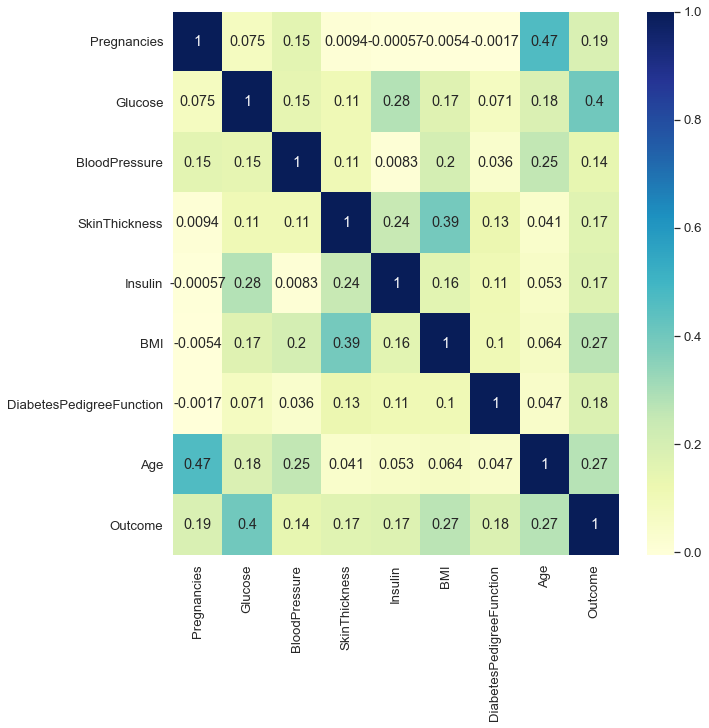

In [32]:
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

> Now what does this mean ?
- The dark shades indicate a strong negative corelation
- The lighter shades indicate a strong positive corelation
- If any variable is plotted against itself, it'll have a corelation of 1

> we will accept all features > .25 (3)
#### The features accepted is : 
- Glucose 
- BMI 
- Age 

In [33]:
# New data based on Kendall Tau Statistic
df_kendall = df[['Glucose','BMI','Age','Outcome']]
df_kendall.head()

Glucose   BMI  Age  Outcome
0      148  33.6   50        1
1       85  26.6   31        0
2      183  23.3   32        1
3       89  28.1   21        0
4      137  43.1   33        1

### Split data to Train and Test Sets

In [34]:
X,y = df_kendall.drop("Outcome",axis=1), df['Outcome']

In [35]:
#Data Spliting
#random_state=0, because i want the same data, not to be shuffeled every time I run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

> the reason why, i have been choose 15% to be test size is that the data have a little observation, so it will be over fit if the number of training data is small 

### Feature Scaling

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [37]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modeling 

In [38]:
# make dataframe to save data in it. 
scores = {"FS method":[],"Model name":[],"Score":[],"Recall":[],"Precesion":[],"F1-score":[]}

In [39]:
# make dataframe to save data in it. 
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(kernel='sigmoid'),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(n_estimators=60),
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators=100, random_state=0),
    "Perceptron": Perceptron()
}

In [40]:
# Training the model and save It's values in data frame 
for name, model in models.items():
    scores["FS method"].append("kendall")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores["Model name"].append(name)
    scores["Score"].append(accuracy_score(y_test, y_pred))
    scores["Recall"].append(recall_score(y_test, y_pred))
    scores["Precesion"].append(precision_score(y_test, y_pred))
    scores["F1-score"].append(f1_score(y_test, y_pred))

<h1 style='text-align:center;'>Analysis of variance (ANAOVA)</h1>

> why use one way ANAOVA ? 
- ANOVA lets you know if your numerical variable changes according to the level of the categorical variable.
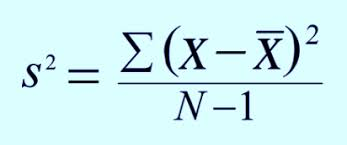

In [41]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# define feature selection
fs = SelectKBest(score_func=f_classif, k=5)
# apply feature selection
X_selected = fs.fit_transform(df.drop("Outcome",axis=1), df['Outcome'])
print(X_selected.shape)

(1000, 5)


> we will accept just 5 features  
#### The features accepted is : 
- Pregnancies
- BloodPressure
- Glucose 
- BMI 
- Age

In [42]:
# New data based on Anova 
df_Anova = df[['Glucose','BMI','Pregnancies','BloodPressure','Age','Outcome']]
df_Anova.head()

Glucose   BMI  Pregnancies  BloodPressure  Age  Outcome
0      148  33.6            6             72   50        1
1       85  26.6            1             66   31        0
2      183  23.3            8             64   32        1
3       89  28.1            1             66   21        0
4      137  43.1            0             40   33        1

### Split data to Train and Test Sets

In [43]:
X,y = df_Anova.drop("Outcome",axis=1), df_Anova['Outcome']

In [44]:
#Data Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

> the reason why, i have been choose 15% to be test size is that the data have a little observation, so it will be over fit if the number of training data is small 

### Feature Scaling

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [46]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modeling

In [47]:
for name, model in models.items():
    scores["FS method"].append("Anova")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores["Model name"].append(name)
    scores["Score"].append(accuracy_score(y_test, y_pred))
    scores["Recall"].append(recall_score(y_test, y_pred))
    scores["Precesion"].append(precision_score(y_test, y_pred))
    scores["F1-score"].append(f1_score(y_test, y_pred))


## After our attempts to discover the most important features in filter's way, let's see intrinsic's way

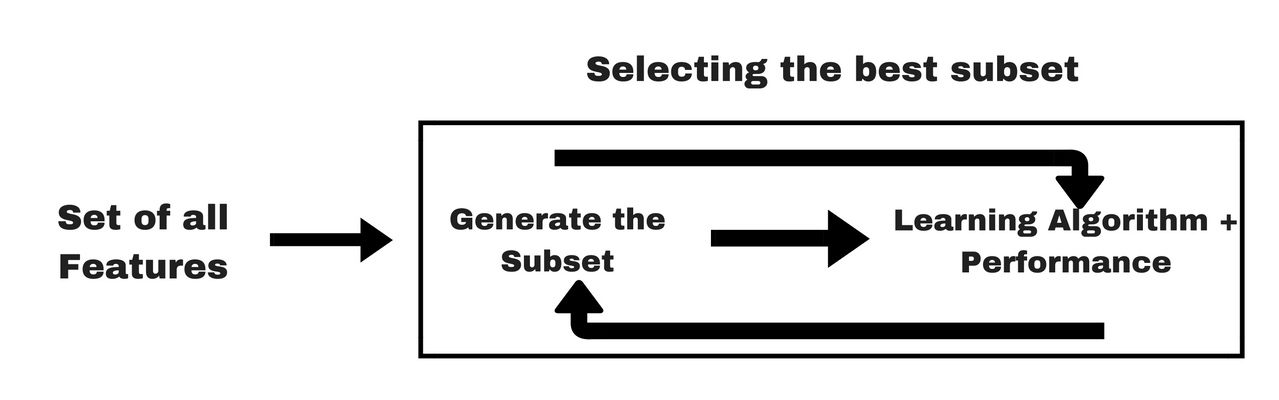

> Why use intrinsic's way ? 
- intrinsic methods combine the strong points of filter and wrapper methods by taking advantage of machine algorithms that have their own built-in feature selection process. They integrate a feature selection step as a part of the training process (i.e., feature selection and training process are performed simultaneously). Embedded methods generally have a more efficient process than wrapper methods because they eliminate the need to retrain every single subset of features being examined.

-  Some of machine algorithms that can be used for feature selection are:   
    1. LASSO regression
    2. Random forest

<h1 style='text-align:center;'>LASSO Regularization (L1)</h1>

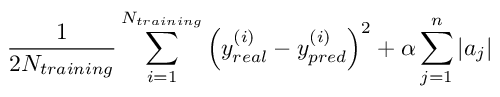

> why use LASSO Regularization? 
- L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [49]:
X,y = df.drop("Outcome",axis=1), df['Outcome']
features = df.columns[:-1]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [51]:
# Our pipeline is made by a StandardScaler and the Lasso object itself.
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [52]:
# Now we have to optimize the α hyperparameter of Lasso regression. 
# For this example, we are going to test several values from 0.1 to 10 with 0.1 step.
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [53]:
# fit the grid search.
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.201 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.203 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.202 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.202 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.200 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.238 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.235 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.236 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.237 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.238 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.251 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

[CV 1/5] END ..model__alpha=2.4000000000000004;, score=-0.251 total time=   0.0s
[CV 2/5] END ..model__alpha=2.4000000000000004;, score=-0.250 total time=   0.0s
[CV 3/5] END ..model__alpha=2.4000000000000004;, score=-0.250 total time=   0.0s
[CV 4/5] END ..model__alpha=2.4000000000000004;, score=-0.250 total time=   0.0s
[CV 5/5] END ..model__alpha=2.4000000000000004;, score=-0.251 total time=   0.0s
[CV 1/5] END ..model__alpha=2.5000000000000004;, score=-0.251 total time=   0.0s
[CV 2/5] END ..model__alpha=2.5000000000000004;, score=-0.250 total time=   0.0s
[CV 3/5] END ..model__alpha=2.5000000000000004;, score=-0.250 total time=   0.0s
[CV 4/5] END ..model__alpha=2.5000000000000004;, score=-0.250 total time=   0.0s
[CV 5/5] END ..model__alpha=2.5000000000000004;, score=-0.251 total time=   0.0s
[CV 1/5] END .................model__alpha=2.6;, score=-0.251 total time=   0.0s
[CV 2/5] END .................model__alpha=2.6;, score=-0.250 total time=   0.0s
[CV 3/5] END ...............

[CV 5/5] END ..model__alpha=4.3999999999999995;, score=-0.251 total time=   0.0s
[CV 1/5] END .................model__alpha=4.5;, score=-0.251 total time=   0.0s
[CV 2/5] END .................model__alpha=4.5;, score=-0.250 total time=   0.0s
[CV 3/5] END .................model__alpha=4.5;, score=-0.250 total time=   0.0s
[CV 4/5] END .................model__alpha=4.5;, score=-0.250 total time=   0.0s
[CV 5/5] END .................model__alpha=4.5;, score=-0.251 total time=   0.0s
[CV 1/5] END .................model__alpha=4.6;, score=-0.251 total time=   0.0s
[CV 2/5] END .................model__alpha=4.6;, score=-0.250 total time=   0.0s
[CV 3/5] END .................model__alpha=4.6;, score=-0.250 total time=   0.0s
[CV 4/5] END .................model__alpha=4.6;, score=-0.250 total time=   0.0s
[CV 5/5] END .................model__alpha=4.6;, score=-0.251 total time=   0.0s
[CV 1/5] END .................model__alpha=4.7;, score=-0.251 total time=   0.0s
[CV 2/5] END ...............

[CV 4/5] END .................model__alpha=6.9;, score=-0.250 total time=   0.0s
[CV 5/5] END .................model__alpha=6.9;, score=-0.251 total time=   0.0s
[CV 1/5] END .................model__alpha=7.0;, score=-0.251 total time=   0.0s
[CV 2/5] END .................model__alpha=7.0;, score=-0.250 total time=   0.0s
[CV 3/5] END .................model__alpha=7.0;, score=-0.250 total time=   0.0s
[CV 4/5] END .................model__alpha=7.0;, score=-0.250 total time=   0.0s
[CV 5/5] END .................model__alpha=7.0;, score=-0.251 total time=   0.0s
[CV 1/5] END .................model__alpha=7.1;, score=-0.251 total time=   0.0s
[CV 2/5] END .................model__alpha=7.1;, score=-0.250 total time=   0.0s
[CV 3/5] END .................model__alpha=7.1;, score=-0.250 total time=   0.0s
[CV 4/5] END .................model__alpha=7.1;, score=-0.250 total time=   0.0s
[CV 5/5] END .................model__alpha=7.1;, score=-0.251 total time=   0.0s
[CV 1/5] END ...............

[CV 5/5] END .................model__alpha=9.3;, score=-0.251 total time=   0.0s
[CV 1/5] END .................model__alpha=9.4;, score=-0.251 total time=   0.0s
[CV 2/5] END .................model__alpha=9.4;, score=-0.250 total time=   0.0s
[CV 3/5] END .................model__alpha=9.4;, score=-0.250 total time=   0.0s
[CV 4/5] END .................model__alpha=9.4;, score=-0.250 total time=   0.0s
[CV 5/5] END .................model__alpha=9.4;, score=-0.251 total time=   0.0s
[CV 1/5] END .................model__alpha=9.5;, score=-0.251 total time=   0.0s
[CV 2/5] END .................model__alpha=9.5;, score=-0.250 total time=   0.0s
[CV 3/5] END .................model__alpha=9.5;, score=-0.250 total time=   0.0s
[CV 4/5] END .................model__alpha=9.5;, score=-0.250 total time=   0.0s
[CV 5/5] END .................model__alpha=9.5;, score=-0.251 total time=   0.0s
[CV 1/5] END .................model__alpha=9.6;, score=-0.251 total time=   0.0s
[CV 2/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [54]:
# The best value for α is:
search.best_params_

{'model__alpha': 0.1}

In [55]:
# coefficients of Lasso regression.
coefficients = search.best_estimator_.named_steps['model'].coef_

In [56]:
#The importance of a feature is the absolute value of its coefficient
importance = np.abs(coefficients)

In [57]:
np.array(features)[importance > 0]

array(['Glucose', 'BMI'], dtype=object)

In [58]:
np.array(features)[importance == 0]

array(['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'Age'], dtype=object)

> we will accept just 2 features  
#### The features accepted is : 
- Glucose 
- BMI 

In [59]:
# New data based on Anova 
df_LASSO = df[['Glucose','BMI','Outcome']]
df_LASSO.head()

Glucose   BMI  Outcome
0      148  33.6        1
1       85  26.6        0
2      183  23.3        1
3       89  28.1        0
4      137  43.1        1

### Split data to Train and Test Sets

In [60]:
X,y = df_LASSO.drop("Outcome",axis=1), df['Outcome']

In [61]:
#Data Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

> the reason why, i have been choose 15% to be test size is that the data have a little observation, so it will be over fit if the number of training data is small 

### Feature Scaling

In [62]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [63]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
for name, model in models.items():
    scores["FS method"].append("Lasso")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores["Model name"].append(name)
    scores["Score"].append(accuracy_score(y_test, y_pred))
    scores["Recall"].append(recall_score(y_test, y_pred))
    scores["Precesion"].append(precision_score(y_test, y_pred))
    scores["F1-score"].append(f1_score(y_test, y_pred))

<h1 style='text-align:center;'>Random forest</h1>

> why use Random forest? 
- Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. 

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [66]:
x,y = df.drop("Outcome",axis=1), df['Outcome']

In [67]:
all_features = x.columns
all_features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [68]:
rfc = RandomForestClassifier(random_state=0, criterion='gini') # Use gini criterion to define feature importance


In [69]:
selector = SelectFromModel(estimator=rfc)


In [70]:
selector.fit(x, y)

SelectFromModel(estimator=RandomForestClassifier(random_state=0))

In [71]:
selector.get_support(indices=True)

array([1, 5, 6, 7], dtype=int64)

In [72]:
selected_features_idx = selector.get_support(indices=True)
selected_features_idx

array([1, 5, 6, 7], dtype=int64)

In [73]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

In [74]:
x[selected_features]

Glucose        BMI  DiabetesPedigreeFunction  Age
0        148  33.600000                  0.627000   50
1         85  26.600000                  0.351000   31
2        183  23.300000                  0.672000   32
3         89  28.100000                  0.167000   21
4        137  43.100000                  2.288000   33
..       ...        ...                       ...  ...
995      146  35.375728                  0.551894   51
996      117  42.166538                  0.661293   21
997      123  40.344485                  0.631282   30
998      146  32.672436                  0.488333   56
999      152  49.404671                  0.360093   26

[1000 rows x 4 columns]

> we will accept just 4 features  
#### The features accepted is : 
- Glucose 
- BMI 
- DiabetesPedigreeFunction
- Age

In [75]:
# New data based on Anova 
df_RF = df[['Glucose','BMI','Outcome','DiabetesPedigreeFunction','Age']]
df_RF.head()

Glucose   BMI  Outcome  DiabetesPedigreeFunction  Age
0      148  33.6        1                     0.627   50
1       85  26.6        0                     0.351   31
2      183  23.3        1                     0.672   32
3       89  28.1        0                     0.167   21
4      137  43.1        1                     2.288   33

### Split data to Train and Test Sets

In [76]:
X,y = df_RF.drop("Outcome",axis=1), df['Outcome']

In [77]:
#Data Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

> the reason why, i have been choose 15% to be test size is that the data have a little observation, so it will be over fit if the number of training data is small 

### Feature Scaling

In [78]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [79]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modeling

In [80]:
for name, model in models.items():
    scores["FS method"].append("RF")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores["Model name"].append(name)
    scores["Score"].append(accuracy_score(y_test, y_pred))
    scores["Recall"].append(recall_score(y_test, y_pred))
    scores["Precesion"].append(precision_score(y_test, y_pred))
    scores["F1-score"].append(f1_score(y_test, y_pred))

________________________________________

In [81]:
ss = pd.DataFrame(scores)

In [82]:
ss.Score.max()

0.8466666666666667

### The best model to use in this case is: 
**Adaboost**


In [85]:
ss[ss['Score'] == ss.Score.max()]

FS method          Model name     Score   Recall  Precesion  F1-score
12     Anova  AdaBoostClassifier  0.846667  0.84058   0.828571  0.834532

### The bset feature selection technique is : 
**Anova**

In [86]:
ss[ss['Model name'] == 'AdaBoostClassifier']

FS method          Model name     Score    Recall  Precesion  F1-score
5    kendall  AdaBoostClassifier  0.793333  0.782609   0.771429  0.776978
12     Anova  AdaBoostClassifier  0.846667  0.840580   0.828571  0.834532
19     Lasso  AdaBoostClassifier  0.806667  0.898551   0.738095  0.810458
26        RF  AdaBoostClassifier  0.810000  0.869565   0.754717  0.808081